<a href="https://colab.research.google.com/github/rbbh/ARIMA-playground/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
pip install pmdarima

In [0]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from google.colab import files
uploaded = files.upload()

Saving airlines2.txt to airlines2.txt


In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict

data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

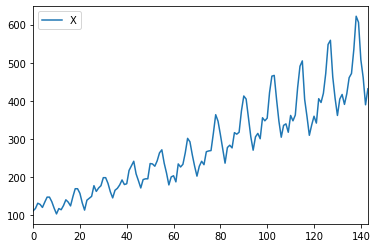

In [61]:
data.plot()

In [0]:
data_n = data.copy()
data_n = data_n/data_n.max()

In [63]:
len(data)

144

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


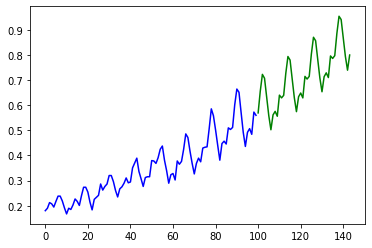

In [64]:
# Load/split the data
train, test = train_test_split(data_n, train_size=100)

# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_n.shape[0])
plt.plot(x[:100], train, c='blue')
plt.plot(x[100:], forecasts, c='green')
plt.show()

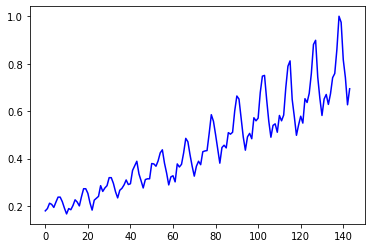

In [65]:
x = np.arange(data.shape[0])
plt.plot(x, data_n, c='blue')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [67]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.0031495669091119653


In [0]:
# Extra packages for if the traditional prediction
# method doesn't work

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

In [69]:
# Define and fit the pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); AIC=-320.778, BIC=-300.959, Fit time=3.078 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-245.715, BIC=-240.760, Fit time=0.105 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=-317.274, BIC=-307.365, Fit time=1.516 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=-302.336, BIC=-292.427, Fit time=2.000 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-95.954, BIC=-93.477, Fit time=0.037 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 1, 1, 12); AIC=-324.777, BIC=-307.436, Fit time=2.901 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 1, 0, 12); AIC=-299.371, BIC=-284.507, Fit time=0.912 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 1, 2, 12); AIC=-322.698, BIC=-302.880, Fit time=6.854 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 0, 12); AIC=-317.278, BIC=-299.936, Fit time=2.544 seconds
Fit ARIMA: order=(2, 0, 2) sea

Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
                           information_criterion='aic', m=12, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [0]:
# Serializing the model:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

In [74]:
# Loading it and making predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    forecasts = mod.predict(44)
    print(forecasts)

[0.56718929 0.65194088 0.72937973 0.71808724 0.63830907 0.56051428
 0.49390188 0.56253083 0.57837347 0.56113926 0.65435062 0.64221385
 0.64887499 0.74426659 0.83097674 0.81750835 0.72681006 0.63849164
 0.56289282 0.64025799 0.65796857 0.63836223 0.74342773 0.72963605
 0.73706576 0.84450384 0.94207584 0.92686435 0.82469746 0.72514156
 0.63985543 0.727096   0.74704668 0.72493549 0.84330645 0.82776662
 0.83612833 0.95706198 1.06679904 1.04969191 0.93476494 0.82268312
 0.72658376 0.82488173]


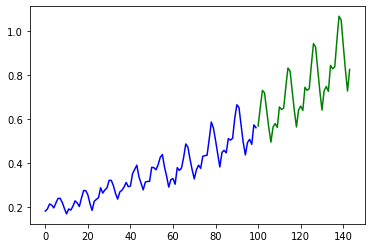

In [75]:
x = np.arange(data_n.shape[0])
plt.plot(x[:100], train, c='blue')
plt.plot(x[100:], forecasts, c='green')
plt.show()

In [76]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.0054920776187293695
